In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
np.random.seed(0)

from sklearn import datasets
n_samples = 120
#X, y = datasets.make_classification(n_samples=120, n_features=2, n_informative=2, n_redundant=0, n_classes=2)
x, y = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=[(0,5),(3,0)], random_state=0)

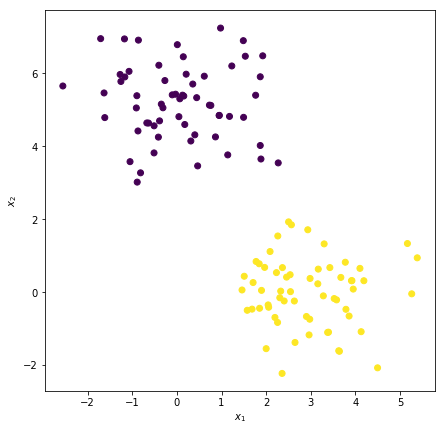

In [3]:
plt.figure(figsize=(7,7))
plt.scatter(x[:,0], x[:,1], c=y, cmap=cm.viridis)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

**Stochastic gradient descent**

In [4]:
def sigm(x, th):
    """
    Sigmoid function
    
    Parameters:
    x -- N times M+1 design matrix.  N=1 is also valid.
    th -- theta M+1 vector of paratmeters.
    
    Returns:
    N-dimensional vector -- contains reponse of the sigmoid function specified by parameters th 
                            at locations specified by x
    """
    return 1. / (1. + np.exp( - np.dot(x, th) ))

def prediction(y):
    """
    Predictor for logistic regression.
    
    Arguments:
    y -- a vector containing values between 0 and 1 (responses of a sigmoid function)
    
    Returns:
    A vector containg 1 or 0, depending upon whether or not a 
    particular response is greater or equal to .5 or not
    """
    z = np.zeros(y.shape)
    z[np.where(y >= .5)] = 1
    return z
    
def error(x, y, th):
    """
    Error computation for logistic regression
    """
    return np.sum(abs(y - prediction(sigm(x, th)))) / 120.
    
def make_design_matrix(x, n_samples):
    """
    Constructs a design matrix from data points.  Assumes that x is N-times-M.
    Here N refers to the number of data points and M is the length (number of dimensions)
    for each data point.
    
    Paramters:
    x - N-times-M matrix containing N M-dimensional data points
    n_sample - number of samples (this is equal to N)
    
    Returns:
    a N-times-(M+1) matrix, whose first column is bias (equal to 1)
    """
    return np.append(np.ones([n_samples, 1]), x, 1)

In [5]:
n_itr = 1000
learning_rate = 0.01
th = np.random.uniform(0,1,[3])
# Try setting learning_rate to 0.0001, n_itr to 10000, and initialize th to between 0 and 100

errs = np.empty([n_itr])

    
# Stochastic gradient descent
X = make_design_matrix(x, n_samples)
for i in range(n_itr):    
    for j in range(n_samples):
        th = th + learning_rate * X[j,:] * (y[j] - sigm(X[j,:], th) )
    errs[i] = error(X, y, th)

print 'theta', th

theta [ 1.47282216  3.66615419 -3.61893537]


**Plotting the decision boundary**

$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$

So we can plot this line by constructing $y = mx + c$ form as follows

$x_2 = - \frac{\theta_0}{\theta_2} - \frac{\theta_1}{\theta_2} x_1$

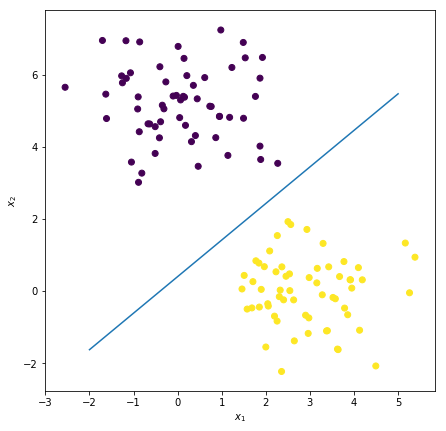

In [6]:
x1 = np.linspace(-2,5,100)
y1 = - th[0]/th[2] - th[1]*x1/th[2]
plt.figure(figsize=(7,7))
plt.plot(x1,y1,'-')
plt.scatter(x[:,0], x[:,1], c=y, cmap=cm.viridis)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

**Visualizing the sigmoid function**

In [7]:
x1 = np.linspace(-3,6,100)
x2 = np.linspace(-3,8,100)
xv1, xv2 = np.meshgrid(x1,x2)
xx = np.vstack((xv1.ravel(), xv2.ravel()))
zz = sigm(np.vstack( (np.ones([10000]), xx )).T, th)
z_at_zero = np.zeros([n_samples]) # this to also plot the data points

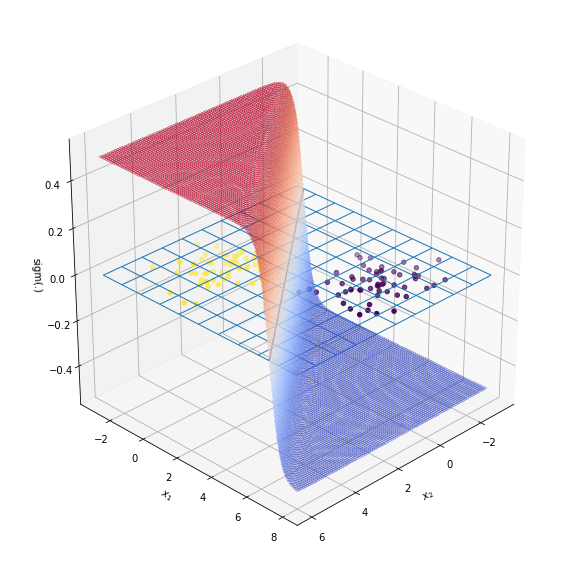

In [8]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 45)
ax.scatter(x[:,0], x[:,1], z_at_zero, c=y, cmap=cm.viridis)
ax.plot_surface(xv1, xv2, zz.reshape(100,100)-0.5, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=.3)
ax.plot_wireframe(xv1, xv2, np.zeros([100,100]), rstride=10, cstride=10, linewidth=1)
ax.contour(xv1, xv2, zz.reshape(100,100)-0.5, [0], c='red')
ax.set_xlabel('$x_2$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('sigm(.)')

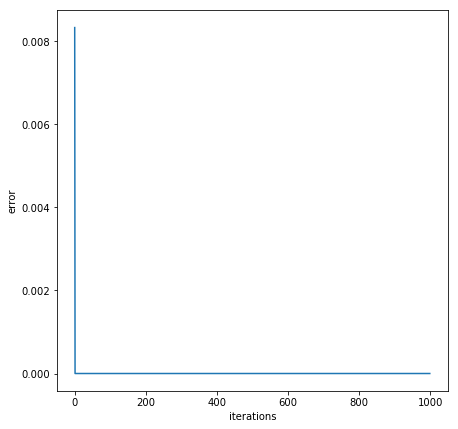

In [9]:
plt.figure(figsize=(7,7))
plt.plot(errs)
plt.xlabel('iterations')
plt.ylabel('error')

In [10]:
for i in range(n_samples):
    print sigm(X[i,:], th), y[i] 

5.58957145678e-10 0
2.19468881685e-08 0
0.999999999991 1
0.999999981947 1
4.36160580713e-08 0
1.48273397795e-08 0
0.999843854639 1
1.15650241948e-08 0
1.58382024021e-06 0
3.40271981153e-06 0
0.998000675323 1
1.7302701825e-08 0
0.999963520683 1
0.999880158428 1
1.57360265589e-08 0
0.999999998945 1
3.51518167038e-10 0
0.999993757384 1
0.997577727474 1
0.999972263746 1
8.17202302672e-08 0
0.999999984284 1
0.0019491834547 0
0.999947199134 1
6.57025700065e-10 0
0.999999903077 1
7.08462087255e-08 0
3.14867797707e-06 0
0.999993985294 1
0.999985516055 1
0.99999857515 1
3.28102299809e-07 0
0.999997044165 1
6.33435476005e-07 0
0.999971523691 1
0.999978295655 1
2.55839129003e-12 0
2.1086613736e-05 0
4.88756270563e-13 0
0.999999826178 1
3.23791475539e-11 0
3.02607924006e-06 0
0.992774980693 1
9.79748907969e-11 0
7.22148623269e-13 0
0.984985030881 1
0.0457676851571 0
4.55272116712e-08 0
3.41233135197e-06 0
0.974975797197 1
4.18841938565e-06 0
0.995527994244 1
1.79881554231e-09 0
3.66912431711e-11 0

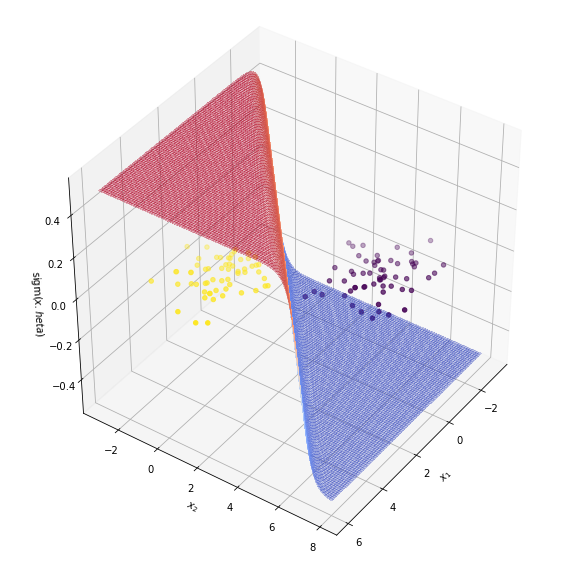

In [11]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, 35)
ax.scatter(x[:,0], x[:,1], z_at_zero, c=y, cmap=cm.viridis)
ax.plot_surface(xv1, xv2, zz.reshape(100,100)-.5, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=.3)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('sigm($x . \theta$)')

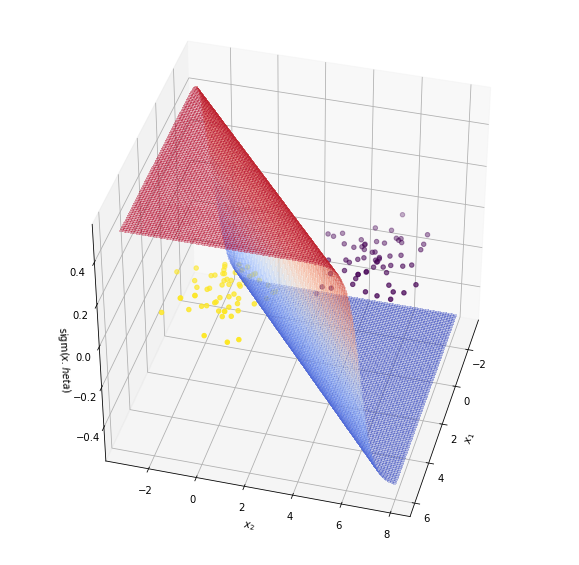

In [12]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, 15)
ax.scatter(x[:,0], x[:,1], z_at_zero, c=y, cmap=cm.viridis)
ax.plot_surface(xv1, xv2, zz.reshape(100,100)-.5, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=.3)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('sigm($x . \theta$)')

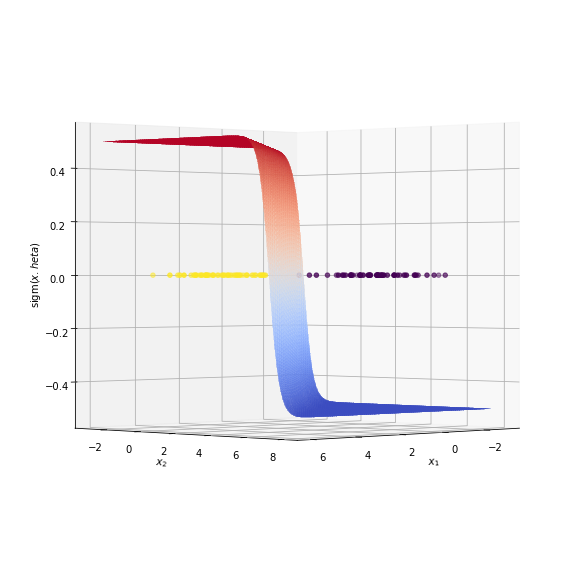

In [13]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0, 45)
ax.scatter(x[:,0], x[:,1], z_at_zero, c=y, cmap=cm.viridis)
ax.plot_surface(xv1, xv2, zz.reshape(100,100)-0.5, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=.3)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('sigm($x . \theta$)')